# Running Example
## Prerequisite
- Please install python libraries mentioned in requirements.txt, you can do it using pip install -r requirements.txt
    - The code is tested using the versions that are specified in requirements.txt

In [1]:
import pm4py
from pm4py.visualization.ocel.ocdfg import visualizer as ocdfg_visualization
import processmining.discovery.ocdfg.markov as ocdfgmrkv
import processmining.log.ocel as ocelhelper

Let's start by discovering an ocdfg from the log file. 

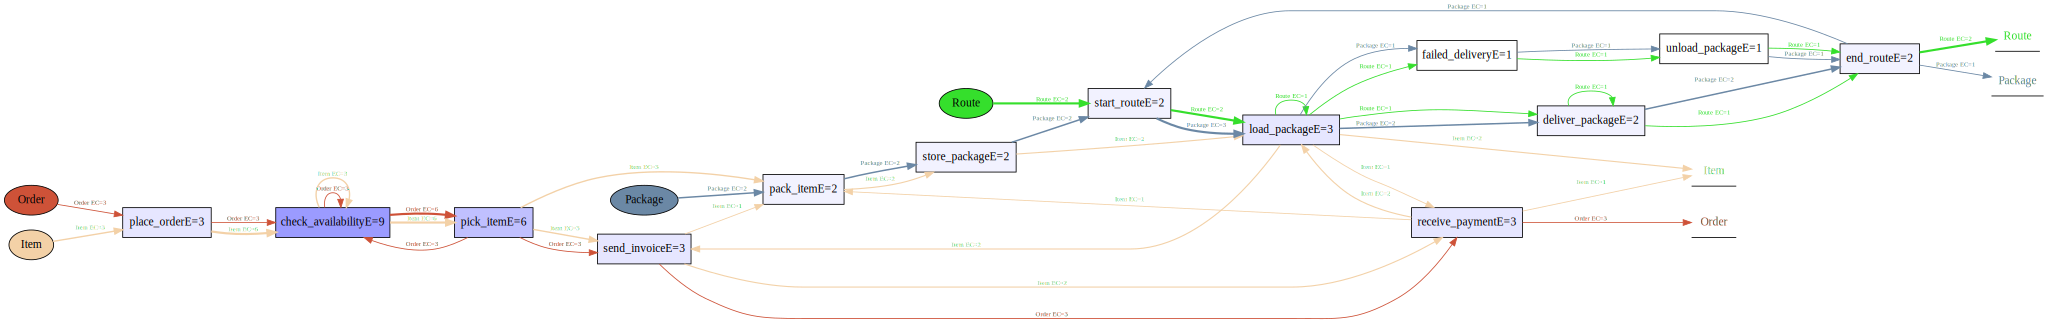

In [2]:
file_path = './datasets/Table1.jsonocel'
ocel = pm4py.read_ocel(file_path)
ocdfg = pm4py.discover_ocdfg(ocel)
ocdfg_visualization.apply(ocdfg)

Here, we calculate markov ocdfg, discover sets of possible clusters by tuning the threshold parameter:

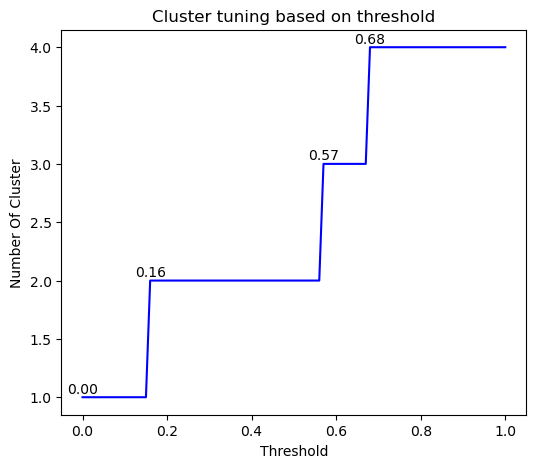

In [3]:
ocdfg_markov = ocdfgmrkv.discover_ocdfg_markov(ocdfg)
sim_matrix = ocdfgmrkv.discover_similarity_matrix(ocdfg_markov)
tunned_similarity_clusters = ocdfgmrkv.similarity_tuning(sim_matrix)
st = ocdfgmrkv.get_similarity_tuning_plot(tunned_similarity_clusters)

In tuning, we can have multiple sets of similar clusters for different thresholds. For example, The clusters for the threshold between 0 and 0.15 are the same. This is needed to visualize the start and end of the line. In order to calculate the unique number of clusters with unique members, we optimize it based on a threshold that has a minimum value. The result is shown below. 

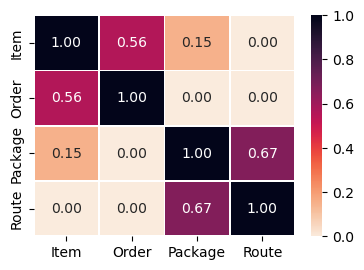

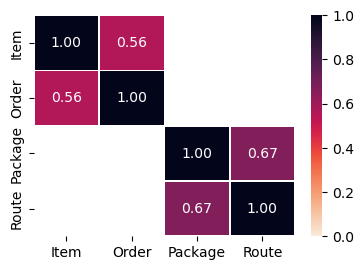

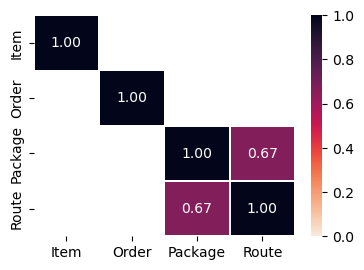

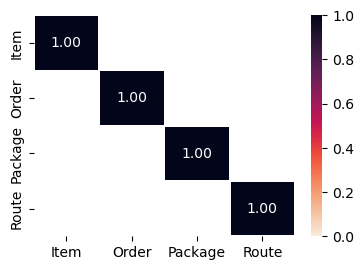

In [4]:
res = ocdfgmrkv.get_optimised_similarity_tuning(sim_matrix)
for thresh, v in res.items():
    test_matrix = ocdfgmrkv.filter_matrix(sim_matrix, thresh)
    s = ocdfgmrkv.get_similarity_plot(test_matrix, size=(4,3), annotation=True)

Let's see the result of cluster discovery when we set the threshold to 16 %: 

In [5]:
clusters_dic = ocdfgmrkv.discover_clusters(sim_matrix, 0.16)
clusters_dic

{0: {'Item', 'Order'}, 1: {'Package', 'Route'}}

As can be seen, we have two clusteres. Lets visualize their ocdfg:

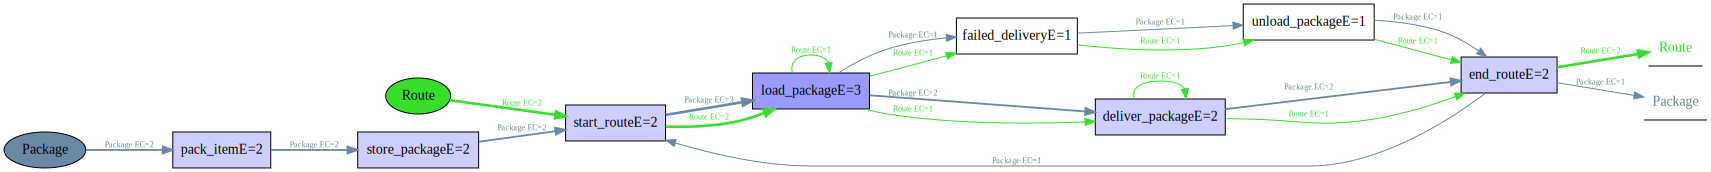

In [6]:
filtered_ocel = ocelhelper.filter_ocel(ocel, event_threshold=0, object_types={'Package', 'Route'})
filtered_ocdfg = pm4py.discover_ocdfg(filtered_ocel)
ocdfg_visualization.apply(filtered_ocdfg)

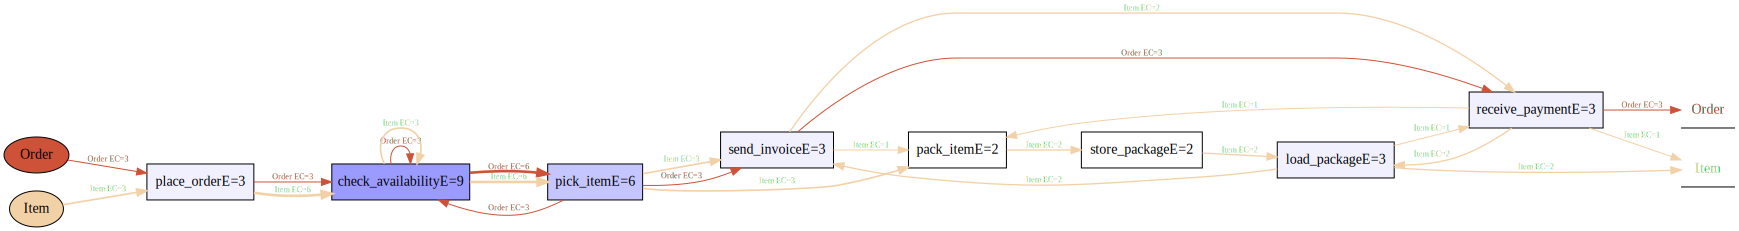

In [7]:
filtered_ocel = ocelhelper.filter_ocel(ocel, event_threshold=0, object_types={'Item', 'Order'})
filtered_ocdfg = pm4py.discover_ocdfg(filtered_ocel)
ocdfg_visualization.apply(filtered_ocdfg)